In [ ]:
import json

import matplotlib.pyplot as plt
from MembraneAnalysisToolbox.DiffusionAnalysis import DiffusionAnalysis
from MembraneAnalysisToolbox.MembraneStructures import CubicMembrane, HexagonalMembrane

path = "/bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/"
print("Path: " + path + "\n")


hexagonal_structure = HexagonalMembrane(
    selectors="resname C",
    L=180,
)


# STEP 1: initialise the Data into the class
DA = DiffusionAnalysis(
    topology_file=path + "topol.tpr",
    trajectory_file=path + "traj.xtc",
    results_dir=path + "analysis/",
    analysis_max_step_size_ps=200,
    verbose=True,
    membrane=hexagonal_structure,
)

print(DA)

/bigpool/users/st166545/TransitionAnalysisProject/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/bigpool/users/st166545/TransitionAnalysisProject/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:202: UserWarning: Cannot write lock/offset file in same location as /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/traj.xtc. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "


Path: /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/

Results will be saved in: /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/analysis/.


/bigpool/users/st166545/TransitionAnalysisProject/.venv/lib/python3.12/site-packages/MDAnalysis/coordinates/XDR.py:258: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/.traj.xtc_offsets.npz'
  warnings.warn(f"Couldn't save offsets because: {e}")


DiffusionAnalysis object:
  topology_file: /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/topol.tpr
  trajectory_file: /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/traj.xtc
  results_dir: /bigpool/users/ac130484/project/finished_sim/hex/hex_dod_pol/sim_1/analysis/
  Membrane: HexagonalMembrane: L=180; selector=resname C; lowerZ=None
  verbose: True
  trajectories: dict_keys([])
  results: 
      D: {}
      passageTimes: {}
      passageStarts: {}
      passageIndices: {}
      n_passages: {}
  Simulation footprints: 
      u_trajectory_dt (ps): 500.0
      u_sim_time (ps): 5000000.0
      analysis_max_step_size_ps (ps): 200
      actual analysed step_size (ps): 500.0
      nth_frame: 1
      n_frames analysed: 10001
      ana_sim_time (ps): 5000000.0
      u: <Universe with 36930 atoms>
      unique atom names: {'C1', 'R2', 'C2', 'R3', 'C', 'R1'}
      unique tyep: {'HEX', 'DOD', 'C'}
      unique combinations: {('C', 'C'), ('DOD', 'R2'), ('DO

In [ ]:
DA._allocateTrajectories("resname DOD and name R2")

Allocating trajectories for selectors: "resname DOD and name R2".
	Progress: 100%
Trajectories allocated.


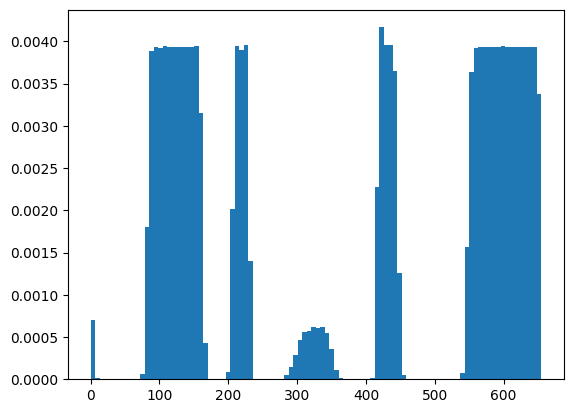

In [31]:
z_trajs = DA.trajectories["resname DOD and name R2"][:,:,2].flatten()
plt.hist(z_trajs, density=True, bins=100)
# plt.plot(DA.timeline,z_trajs[2:4])
plt.show()